# 濾波Q&A

1. 先處理 NaN、inf 還先濾波??
    > 先處理 Nan、inf

2. ### 刪除Channel 還是刪除人??
    > 先刪除 Channel，不行再刪除人

In [1]:
# import 必須資料
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 確認資料夾，如果VFT data 跟 .ipynb 沒放同一個資料夾就要改這裡
print(os.getcwd())
# path = 'C:\\Users\\User\\Desktop\\Machine Learning\\police2_all_data\\【警察】DATA\\raw data_all\\新\\VFT'
# os.chdir(path)

c:\Users\BOIL_PO\Desktop\VFT_clean_version


In [4]:
# Find all csv files
all_csv = glob.glob('VFT/*.csv')
print("length = ", len(all_csv))

# 計算沒有重複的名字
# 刻在你心裡的名字
count_name = []
for banana in all_csv :
    real_name = banana.split('_')[-1].split('.')[0]
    if real_name  not in count_name:
        count_name.append(real_name)

print('unique name = ', len(count_name))

# 看前五個
all_csv[:5]

length =  39
unique name =  39


['VFT\\2021_3_26_1012_Carnelian.csv',
 "VFT\\2021_3_26_1045_Kal'tsit.csv",
 'VFT\\2021_3_26_1118_Skadi-the-Corrupting-Heart.csv',
 'VFT\\2021_3_26_1143_Gladiia.csv',
 'VFT\\2021_3_26_1405_Ash.csv']

## 這裡注意一下 -> 取columns

`df = df.iloc[:, :9]` 是因為Ch4 經過考量捨棄，為捨棄前請全取

In [22]:
select = 11

df = pd.read_csv(all_csv[4])
df = df.iloc[:, :select]
df.columns

Index(['Time_Host', 'Time_Arduino', 'easingdata', 'CH1_Oxy', 'CH1_Deoxy',
       'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy', 'CH4_Oxy', 'CH4_Deoxy'],
      dtype='object')

In [10]:
# check null 必
df.isna().sum()

Time_Host       0
Time_Arduino    0
easingdata      0
CH1_Oxy         0
CH1_Deoxy       0
CH2_Oxy         0
CH2_Deoxy       0
CH3_Oxy         0
CH3_Deoxy       0
CH4_Oxy         0
CH4_Deoxy       0
dtype: int64

# 畫一張圖看看

1. 用 `subplot()` 可以自動一格一格畫
2. 記得 `tight_layout`

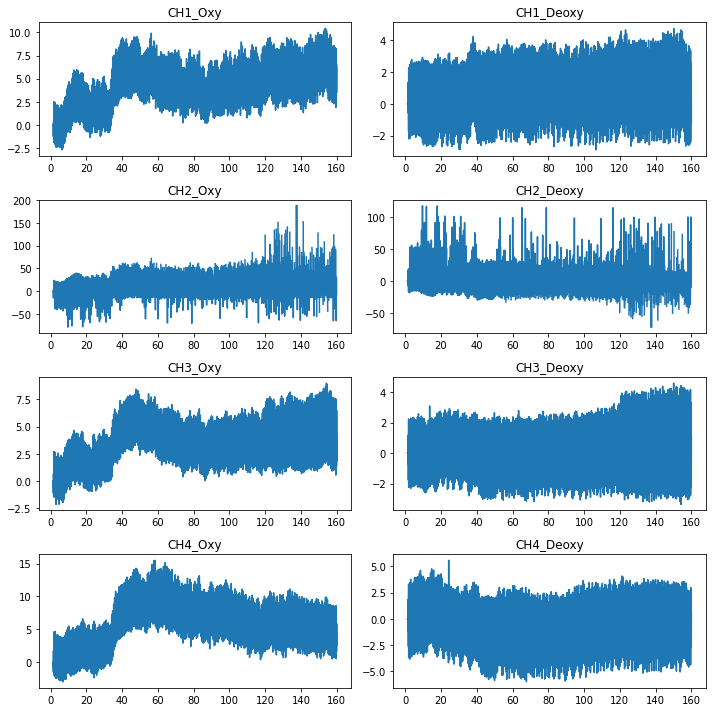

In [12]:
plt.figure(figsize= (10, 10))

for i, cols in enumerate(df.columns[3:]):
    plt.subplot(int((select-3)/2), 2, i+1)
    plt.plot(df['Time_Host'], df[cols])
    plt.title(cols)
    plt.tight_layout()
plt.show()

# 正式開始做  
### 1. 看 NuN 、infinite 

In [14]:
check_state = pd.DataFrame()

for i in all_csv:
    filename = i.split('_')[-1]
    name = filename.split('.')[0] 
    dfs = pd.read_csv(i)
    dfs = dfs.iloc[:, :select]
    check_state[name + '_all'] = dfs.isna().sum() + np.isinf(dfs).sum()

check_state.tail(8)

,Carnelian_all,Kal'tsit_all,Skadi-the-Corrupting-Heart_all,Gladiia_all,Ash_all,Dusk_all,Saga_all,Archetto_all,Mountain_all,Rosmontis_all,...,Bena_all,Kafka_all,Robin_all,Amiya_all,Whisperain_all,Mint_all,April_all,Bibeak_all,Warfarin_all,Specter_all
CH1_Oxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH1_Deoxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH2_Oxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH2_Deoxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH3_Oxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH3_Deoxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH4_Oxy,0,0,0,0,0,0,2877,0,0,0,...,0,0,0,0,0,0,0,2880,0,0
CH4_Deoxy,0,0,0,0,0,0,2877,0,0,0,...,0,0,0,0,0,0,0,2880,0,0


### 看一下各Channel狀況

> 太多Nan的就要去除掉

In [15]:
check_state.sum(axis= 1)

Time_Host          0
Time_Arduino       0
easingdata       256
CH1_Oxy         1363
CH1_Deoxy       1363
CH2_Oxy         2529
CH2_Deoxy       2529
CH3_Oxy            8
CH3_Deoxy          8
CH4_Oxy         5757
CH4_Deoxy       5757
dtype: int64

### 去除Channel 4，但這裡錯誤示範，請用drop，我是直接用iloc，所以才給變數select

In [28]:
select = 9

In [29]:
check_state = pd.DataFrame()

for i in all_csv:
    filename = i.split('_')[-1]
    name = filename.split('.')[0] 
    dfs = pd.read_csv(i)
    dfs = dfs.iloc[:, :select]
    check_state[name + '_all'] = dfs.isna().sum() + np.isinf(dfs).sum()

check_state.tail(8)

,Carnelian_all,Kal'tsit_all,Skadi-the-Corrupting-Heart_all,Gladiia_all,Ash_all,Dusk_all,Saga_all,Archetto_all,Mountain_all,Rosmontis_all,...,Bena_all,Kafka_all,Robin_all,Amiya_all,Whisperain_all,Mint_all,April_all,Bibeak_all,Warfarin_all,Specter_all
Time_Arduino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
easingdata,0,0,0,0,0,0,256,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH1_Oxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH1_Deoxy,0,0,0,0,0,0,1357,0,0,0,...,0,0,6,0,0,0,0,0,0,0
CH2_Oxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH2_Deoxy,0,0,0,0,438,302,116,0,0,0,...,0,0,0,0,4,0,0,0,0,1059
CH3_Oxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH3_Deoxy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 看一下每個人的狀況

> 太多Miss的就要去除掉

In [78]:
rank = check_state.sum(axis= 0).sort_values(ascending= False)[:12]
rank

Saga_all         3218
Specter_all      2118
Ash_all           876
Dusk_all          604
Bagpipe_all       444
Blaze_all         410
Suzuran_all       186
Surtr_all          76
Ceobe_all          52
SilverAsh_all      36
Saria_all          12
Robin_all          12
dtype: int64

# NaN + inf > 1000 刪除

> 閥值自己訂


In [34]:
print(len(all_csv))
bad = rank[rank >1000].index
for alls in all_csv:
    for bads in bad:
        name1 = bads.split("_")[0]

        if name1 in alls:
            print("Delect ", alls)
            all_csv.remove(alls)

print(len(all_csv))

37
37


# 補值

> 就算少，還是不可以有 null, inf

1. ffill -> 最好用，補前值
2. bfill -> 補厚值
3. `pandas.DataFrame.interpolate`  -> 1, 2, ?, 4, 5  $\rightarrow$ ? = 3



In [68]:
# 隨便取一個看缺失值
df = pd.read_csv(all_csv[4])
dfs = df.iloc[:, :9]
print(np.isinf(dfs).sum())


Time_Host         0
Time_Arduino      0
easingdata        0
CH1_Oxy           0
CH1_Deoxy         0
CH2_Oxy         438
CH2_Deoxy       438
CH3_Oxy           0
CH3_Deoxy         0
dtype: int64


### 確認補完後缺失值

In [69]:
dfs[np.isinf(dfs)]= None
dfs = dfs.ffill(axis= 1)
np.isinf(dfs).sum() + dfs.isna().sum()

Time_Host       0
Time_Arduino    0
easingdata      0
CH1_Oxy         0
CH1_Deoxy       0
CH2_Oxy         0
CH2_Deoxy       0
CH3_Oxy         0
CH3_Deoxy       0
dtype: int64

# 濾波
> 請先確認沒有miss值了

1. 四階butterword (可以更改)  -> 可自行查
```
from scipy import signal
b, c = signal.butter(4, 0.01, 'lowpass')
```

$W_n = \frac{f}{f_s/2}$ = $\frac{截止頻率}{取樣頻率/ 2}$

我們的

$\frac{0.01}{24/2} \approx 0.0083$

因為其實 0.01 ~ 0.015都可以，所以取0.012，$W_n就 0.01$

`b, c = signal.butter(4, Wn, 'lowpass')`

In [70]:
# 開始濾波
from scipy import signal

# 0.01 
b, c = signal.butter(4, 0.01, 'lowpass')
print(len(b), len(c))

5 5


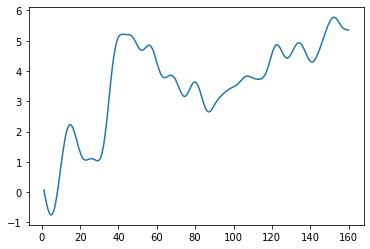

In [71]:
# 濾一張看看
CH1_HbO2_filter_a = signal.filtfilt(b, c, df.CH1_Oxy)
CH1_HbO2_filter_a

plt.plot(df.Time_Host, CH1_HbO2_filter_a)
plt.show()

### 請用for，不要一行一行濾

In [72]:
# 全部一起濾波
need_filt = ['CH1_Oxy', 'CH1_Deoxy', 'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy']

for need in need_filt:
    dfs[need] = signal.filtfilt(b, c, dfs[need])

dfs.head()

,Time_Host,Time_Arduino,easingdata,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
0,1.223,0.04,0.0,0.071013,-0.269972,2.650710,-3.810656,-0.871894,0.627588
1,1.243,0.10,0.0,0.053403,-0.254427,2.477397,-3.580237,-0.851776,0.610879
2,1.264,0.16,0.0,0.035780,-0.238918,2.304116,-3.350008,-0.831830,0.594298
3,1.284,0.21,0.0,0.018151,-0.223453,2.130934,-3.120052,-0.812063,0.577851
4,1.304,0.27,0.0,0.000525,-0.208036,1.957914,-2.890449,-0.792481,0.561545


### 她媽乾淨

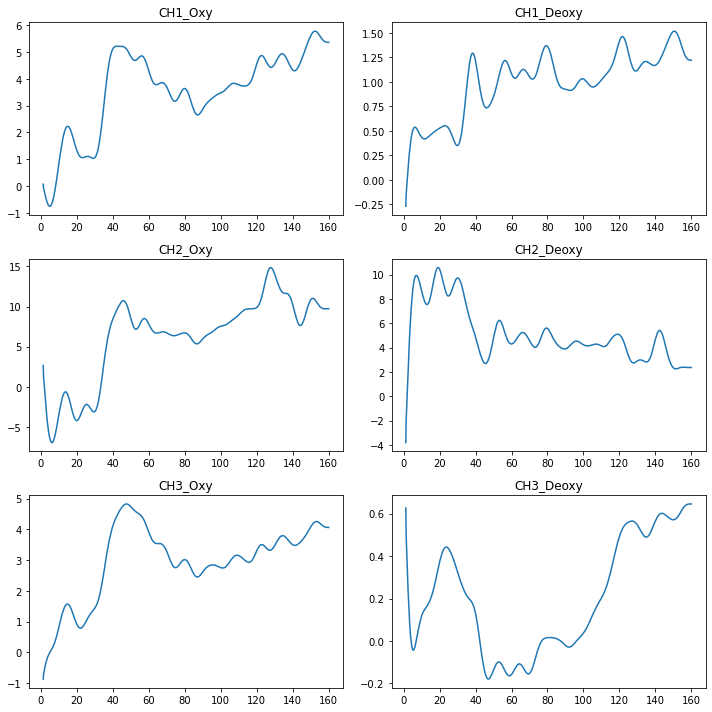

In [73]:
# 濾完了
plt.figure(figsize= (10, 10))

for i, cols in enumerate(need_filt):
    plt.subplot(int((select-3)/2), 2, i+1)
    plt.plot(dfs['Time_Host'], dfs[cols])
    plt.title(cols)
    plt.tight_layout()
plt.show()

# $\star$ 批量濾波 (試試函數能否套用於所有人)

> 上面都是以"一個人"為單位，現在"批量做"



In [74]:
check_states = pd.DataFrame()
need_filt = ['CH1_Oxy', 'CH1_Deoxy', 'CH2_Oxy', 'CH2_Deoxy', 'CH3_Oxy', 'CH3_Deoxy']
b, c = signal.butter(4, 0.01, 'lowpass')

for i in all_csv:
    filename = i.split('_')[-1]
    name = filename.split('.')[0] 

    dfs = pd.read_csv(i)
    dfs = dfs.iloc[:, :9]

    dfs[np.isinf(dfs)]= None
    dfs = dfs.ffill(axis= 1)

    for needs in need_filt:
        dfs[needs] = signal.filtfilt(b, c, dfs[needs])
        
    # print(name, "\n", dfs.iloc[:, 3:].describe().loc[['min', 'max']])

    # check_states[name + '_null'] = dfs.isna().sum()
    # check_states[name + '_infinite'] = np.isinf(dfs).sum()
    check_states[name + '_all'] = dfs.isna().sum()+ np.isinf(dfs).sum()



## 確認有濾好，沒有null

In [75]:
check_states.sum(axis= 1).sort_values(ascending= False)

Time_Host       0
Time_Arduino    0
easingdata      0
CH1_Oxy         0
CH1_Deoxy       0
CH2_Oxy         0
CH2_Deoxy       0
CH3_Oxy         0
CH3_Deoxy       0
dtype: int64

In [76]:
rank = check_states.sum(axis= 0).sort_values(ascending= False)[:10]
rank

Carnelian_all      0
Aak_all            0
Hellagur_all       0
SilverAsh_all      0
Saria_all          0
Nightingale_all    0
Hoshiguma_all      0
Shining_all        0
Heavyrain_all      0
Bena_all           0
dtype: int64

# $\star$ MinMax "測試"  -> 消除個體差異

> 消除個體差異

> $\frac{x - x_{min}}{x_{max} - x_{min}}$

In [79]:
# minmax
dfs.iloc[:, 3:] = (dfs.iloc[:, 3:] - dfs.iloc[:, 3:].min())/(dfs.iloc[:, 3:].max()- dfs.iloc[:, 3:].min())
dfs

,Time_Host,Time_Arduino,easingdata,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
0,1.211,0.04,0.00,0.773183,0.342028,0.721114,0.308785,0.704791,0.310244
1,1.230,0.10,0.00,0.775239,0.339656,0.724566,0.307541,0.712364,0.309125
2,1.251,0.15,0.00,0.777240,0.337274,0.727984,0.306286,0.719914,0.308001
3,1.272,0.21,0.00,0.779185,0.334883,0.731367,0.305019,0.727436,0.306873
4,1.293,0.26,0.00,0.781071,0.332485,0.734712,0.303741,0.734926,0.305740
...,...,...,...,...,...,...,...,...,...
2887,159.796,159.56,-2.67,0.000376,0.004461,0.079581,0.004692,0.088142,0.041787
2888,159.836,159.62,-2.69,0.000378,0.004462,0.079580,0.004694,0.088143,0.041789
2889,159.899,159.67,-2.70,0.000379,0.004463,0.079579,0.004696,0.088144,0.041791
2890,159.981,159.73,-2.72,0.000380,0.004464,0.079578,0.004697,0.088145,0.041792


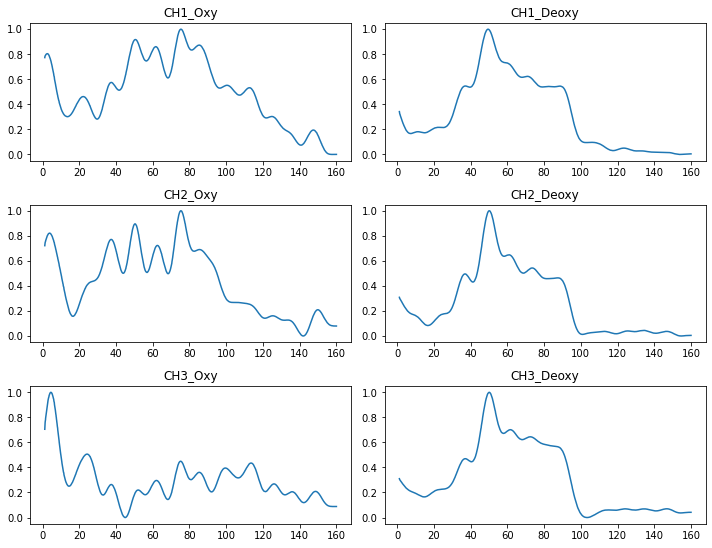

In [80]:
# 畫出來
plt.figure(figsize= (10, 10))
for i, cols in enumerate(need_filt):
    plt.subplot(4, 2, i+1)
    plt.plot(dfs['Time_Host'], dfs[cols])
    plt.title(cols)
    plt.tight_layout()
plt.show()

# 統一 :  data preprocess + Lowpass filter + Minmax + to_csv

1. data preprocess 補值等
2. filter
3. minmax 消除個體差異
4. to_csv 存成csv，放於 filter 處


In [83]:
# 若沒資料夾則創資料夾，有就略過
os.getcwd()
try:
    os.mkdir('Filtered')
except:
    pass

In [82]:
for files in all_csv:
    # 分檔名
    filename = files.split('_')[-1]
    name = filename.split('.')[0] 

    #讀跟切
    dfs = pd.read_csv(files)
    dfs = dfs.iloc[:, :9]

    # inf to nan to ffill
    dfs[np.isinf(dfs)]= None
    dfs = dfs.ffill(axis= 1)

    for needs in need_filt:
        dfs[needs] = signal.filtfilt(b, c, dfs[needs])

    # minmax
    dfs.iloc[:, 3:] = (dfs.iloc[:, 3:] - dfs.iloc[:, 3:].min())/(dfs.iloc[:, 3:].max()- dfs.iloc[:, 3:].min())
        
    dfs.to_csv('Filtered\\'+ "F_" + filename)

# 讀取濾波完的 .csv，並畫圖
> ### time 變成 index 可以直接用loc切

In [84]:
alls = glob.glob('Filtered/*.csv')
alls[:5]

['Filtered\\F_Aak.csv',
 'Filtered\\F_Amiya.csv',
 'Filtered\\F_April.csv',
 'Filtered\\F_Archetto.csv',
 'Filtered\\F_Ash.csv']

In [87]:
# 看個資料型態
check_df = pd.read_csv(alls[5], index_col= 'Unnamed: 0').drop(columns= ['Time_Arduino', 'easingdata'])
print(check_df.dtypes)

# 看前五個
check_df = check_df.set_index('Time_Host')
check_df.head()

Time_Host    float64
CH1_Oxy      float64
CH1_Deoxy    float64
CH2_Oxy      float64
CH2_Deoxy    float64
CH3_Oxy      float64
CH3_Deoxy    float64
dtype: object


,CH1_Oxy,CH1_Deoxy,CH2_Oxy,CH2_Deoxy,CH3_Oxy,CH3_Deoxy
Time_Host,,,,,,
0.035,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.381,0.982881,0.982231,0.982285,0.982622,0.984898,0.982100
1.402,0.965770,0.964464,0.964580,0.965240,0.969798,0.964203
1.423,0.948675,0.946706,0.946891,0.947860,0.954709,0.946314
1.444,0.931601,0.928965,0.929225,0.930490,0.939634,0.928441


# 畫圖

### matplotlib.pyplot 自己練

重點:
1. `facecolor=sns.color_palette('Paired')[1]`  -> 自己配色會比我阿嬤還醜
2. `bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),)1` -> bbox 可以唱bbox

### 階段

* 第一階段: 0 ~ 30  -> rest
* 第二階段: 30 ~ 90  -> Task
* 第三階段: 90 ~ 160  -> recovery

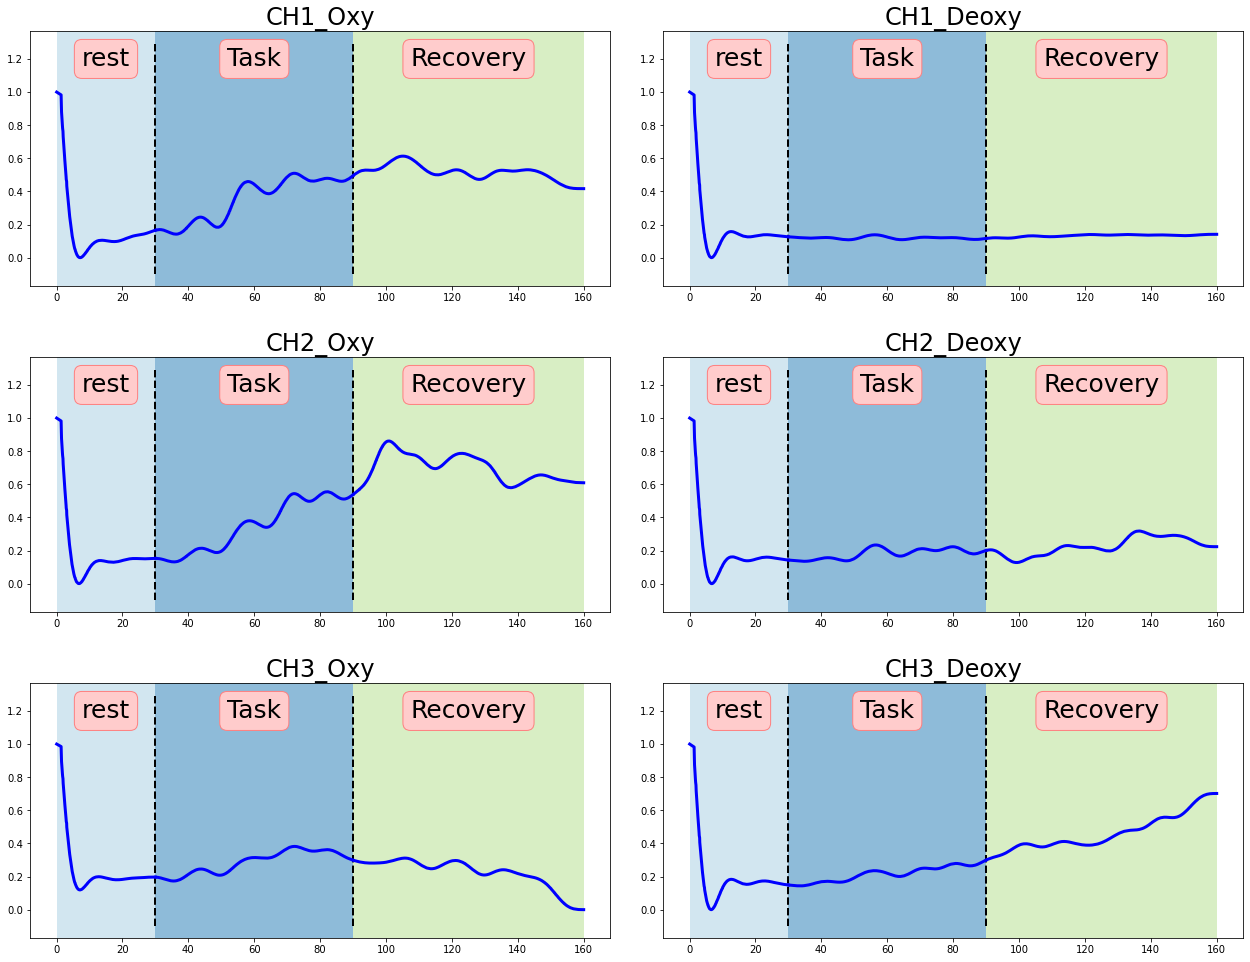

In [88]:
stage1 = 30
stage2 = 90
stage3 = 160
text_size = 25

plt.figure(figsize= (18, 14))
for i, cols in enumerate(check_df):
    plt.subplot(3, 2, i+1)

    # 第一階段
    plt.plot(check_df.loc[:stage1].index, check_df.loc[:stage1][cols], c= 'b',  linewidth=3.0, label= 'Rest')
    plt.axvspan(0, stage1, facecolor=sns.color_palette('Paired')[0], alpha=0.5)
    plt.vlines(stage1, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
    plt.text(stage1/2, 1.2, "rest", size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    # 第二階段
    plt.plot(check_df.loc[stage1:stage2].index, check_df.loc[stage1:stage2][cols], c= 'b', linewidth=3.0, label= 'Task')
    plt.axvspan(stage1, stage2, facecolor=sns.color_palette('Paired')[1], alpha=0.5)
    plt.vlines(stage2, -0.1, 1.3, linestyles= '--', colors= 'black',  linewidth=2.0)
    plt.text((stage2 + stage1)/2, 1.2, 'Task', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    # 第三階段
    plt.plot(check_df.loc[stage2:stage3].index, check_df.loc[stage2:stage3][cols], c= 'b', linewidth=3.0, label= 'Recovery')
    plt.axvspan(stage2, stage3, facecolor=sns.color_palette('Paired')[2], alpha=0.5)
    plt.text((stage3 + stage2)/2, 1.2, 'Recovery', size= text_size, ha="center", va= 'center', bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))

    plt.title(cols, fontdict={'fontsize': 24})
    plt.tight_layout(pad= 3)
plt.show()